In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja macierzy przejść P
P = np.array([
    [0.64, 0.32, 0.04],  # Przejścia z 0 użytkowników zalogowanych
    [0.4,  0.5,  0.1 ],  # Przejścia z 1 użytkownika zalogowanego
    [0.25, 0.5,  0.25 ]  # Przejścia z 2 użytkowników zalogowanych
])

# Parametry obliczeń
max_iterations = 1000
threshold = 1e-6

# Inicjalizacja
N = P.shape[0]
p_n = P.copy()
p_last = np.zeros_like(P)
difference = []

# Iteracyjna potęga macierzy i sprawdzanie zbieżności
for iteration in range(max_iterations):
    p_last = p_n.copy()
    p_n = np.dot(p_n, P)  # P^(N+1) = P^N * P
    diff = np.max(np.abs(p_n - p_last))
    difference.append(diff)
    if diff < threshold:
        break

# Wyznaczenie rozkładu stacjonarnego (średnia dowolnego wiersza macierzy granicznej)
stationary_distribution = p_n[0]

# Wyniki
print("Macierz przejść P:\n", P)
print("Macierz graniczna P^N:\n", p_n)
print("Rozkład stacjonarny:", stationary_distribution)
print("Liczba iteracji do zbieżności:", iteration)


Macierz przejść P:
 [[0.64 0.32 0.04]
 [0.4  0.5  0.1 ]
 [0.25 0.5  0.25]]
Macierz graniczna P^N:
 [[0.51020415 0.40816323 0.08163263]
 [0.51020403 0.40816329 0.08163267]
 [0.51020392 0.40816336 0.08163272]]
Rozkład stacjonarny: [0.51020415 0.40816323 0.08163263]
Liczba iteracji do zbieżności: 11


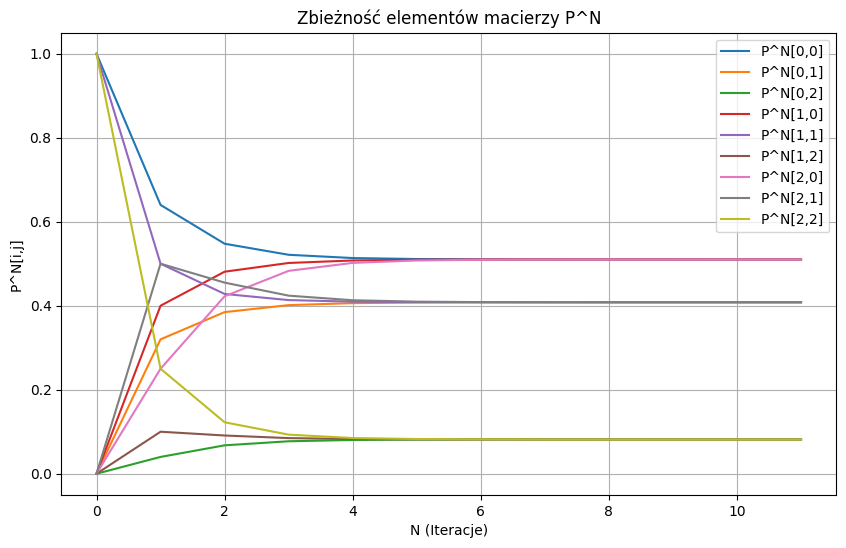

In [5]:
# Wykres zbieżności
plt.figure(figsize=(10, 6))
for i in range(N):
    for j in range(N):
        values = [p_n_step[i, j] for p_n_step in [np.linalg.matrix_power(P, k) for k in range(iteration + 1)]]
        plt.plot(range(len(values)), values, label=f"P^N[{i},{j}]")

plt.xlabel("N (Iteracje)")
plt.ylabel("P^N[i,j]")
plt.title("Zbieżność elementów macierzy P^N")
plt.legend()
plt.grid()
plt.show()

Zadanie B


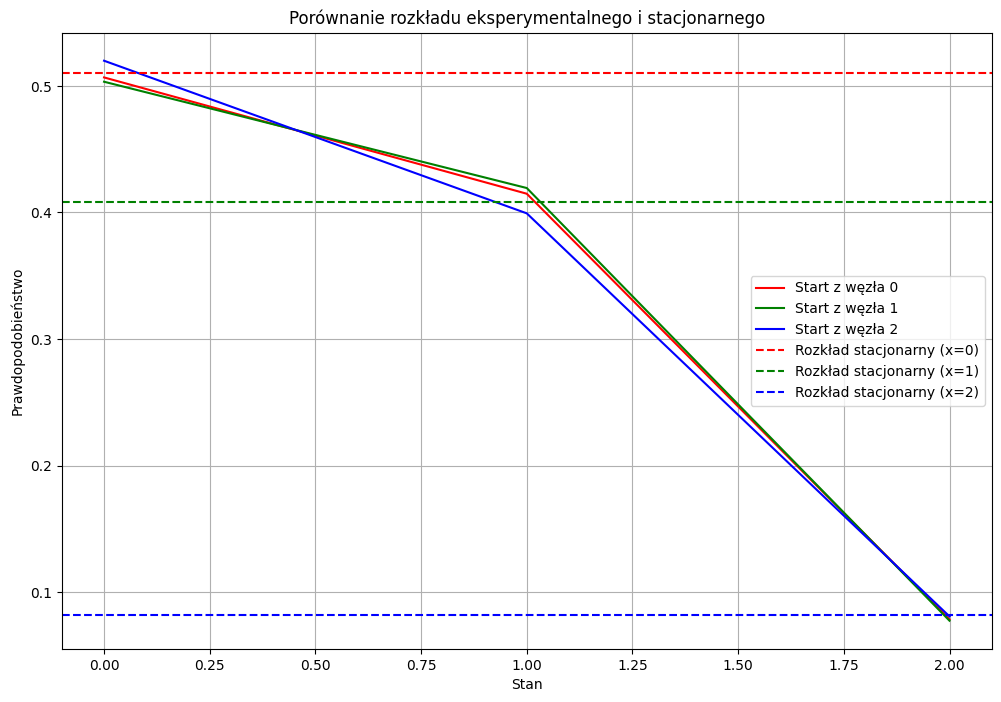

Wyniki eksperymentalne:
Start z węzła 0: [0.5067 0.4148 0.0785]
Start z węzła 1: [0.5033 0.4193 0.0774]
Start z węzła 2: [0.5199 0.3993 0.0808]

Rozkład stacjonarny (analityczny): [0.51020408 0.40816327 0.08163265]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja macierzy przejść P
P = np.array([
    [0.64, 0.32, 0.04],  # Przejścia z 0 użytkowników zalogowanych
    [0.4,  0.5,  0.1 ],  # Przejścia z 1 użytkownika zalogowanego
    [0.25, 0.5,  0.25 ]  # Przejścia z 2 użytkowników zalogowanych
])

# Parametry symulacji
Nmax = 10_000  # liczba losowań
start_nodes = [0, 1, 2]  # początkowe węzły

# Funkcja do przeprowadzenia eksperymentu
def simulate_markov_chain(P, start_node, Nmax):
    N = P.shape[0]
    counts = np.zeros(N)  # Licznik odwiedzin w każdym stanie
    current_node = start_node

    for _ in range(Nmax):
        counts[current_node] += 1
        current_node = np.random.choice(range(N), p=P[current_node])

    return counts / Nmax  # Normalizacja do rozkładu eksperymentalnego

# Wyniki dla każdego początkowego węzła
results = {}
for start_node in start_nodes:
    results[start_node] = simulate_markov_chain(P, start_node, Nmax)

# Wyznaczenie rozkładu granicznego analitycznie (zadanie A)
p_n = np.linalg.matrix_power(P, 1000)  # Przybliżona macierz graniczna
stationary_distribution = p_n[0]

# Wykres zbieżności dla każdego startu
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']

for idx, start_node in enumerate(start_nodes):
    plt.plot(range(len(results[start_node])), results[start_node],
             label=f"Start z węzła {start_node}", color=colors[idx])

plt.axhline(y=stationary_distribution[0], color='r', linestyle='--', label="Rozkład stacjonarny (x=0)")
plt.axhline(y=stationary_distribution[1], color='g', linestyle='--', label="Rozkład stacjonarny (x=1)")
plt.axhline(y=stationary_distribution[2], color='b', linestyle='--', label="Rozkład stacjonarny (x=2)")

plt.xlabel("Stan")
plt.ylabel("Prawdopodobieństwo")
plt.title("Porównanie rozkładu eksperymentalnego i stacjonarnego")
plt.legend()
plt.grid()
plt.show()

# Wyniki eksperymentalne
print("Wyniki eksperymentalne:")
for start_node, distribution in results.items():
    print(f"Start z węzła {start_node}: {distribution}")

print("\nRozkład stacjonarny (analityczny):", stationary_distribution)


Zadanie C

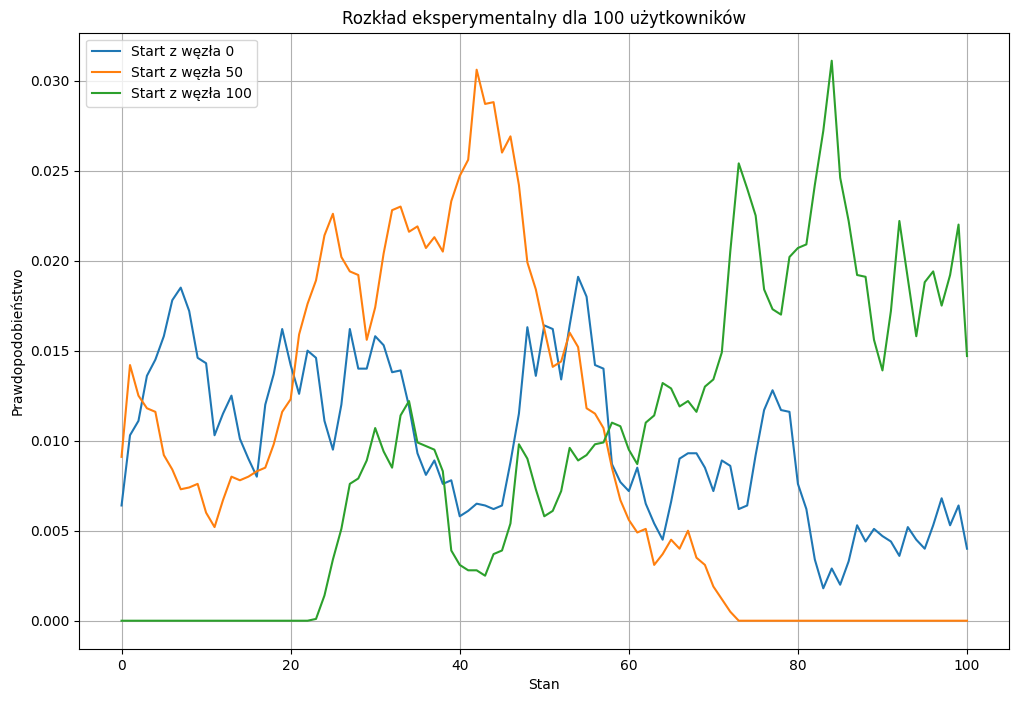

Wyniki eksperymentalne:
Start z węzła 0:
[0.0064 0.0103 0.0111 0.0136 0.0145 0.0158 0.0178 0.0185 0.0172 0.0146
 0.0143 0.0103 0.0115 0.0125 0.0101 0.009  0.008  0.012  0.0137 0.0162
 0.0142 0.0126 0.015  0.0146 0.0111 0.0095 0.012  0.0162 0.014  0.014
 0.0158 0.0153 0.0138 0.0139 0.0119 0.0093 0.0081 0.0089 0.0076 0.0078
 0.0058 0.0061 0.0065 0.0064 0.0062 0.0064 0.0088 0.0115 0.0163 0.0136
 0.0164 0.0162 0.0134 0.0164 0.0191 0.018  0.0142 0.014  0.0087 0.0077
 0.0072 0.0085 0.0065 0.0054 0.0045 0.0066 0.009  0.0093 0.0093 0.0085
 0.0072 0.0089 0.0086 0.0062 0.0064 0.0092 0.0117 0.0128 0.0117 0.0116
 0.0076 0.0062 0.0034 0.0018 0.0029 0.002  0.0033 0.0053 0.0044 0.0051
 0.0047 0.0044 0.0036 0.0052 0.0045 0.004  0.0053 0.0068 0.0053 0.0064
 0.004 ]
Start z węzła 50:
[0.0091 0.0142 0.0125 0.0118 0.0116 0.0092 0.0084 0.0073 0.0074 0.0076
 0.006  0.0052 0.0067 0.008  0.0078 0.008  0.0083 0.0085 0.0098 0.0116
 0.0123 0.0159 0.0176 0.0189 0.0214 0.0226 0.0202 0.0194 0.0192 0.0156
 0.0174 0.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja macierzy przejść P dla 100 użytkowników
def create_transition_matrix(n):
    P = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        if i > 0:
            P[i, i - 1] = 0.5  # Prawdopodobieństwo wylogowania
        P[i, i] = 0.5  # Prawdopodobieństwo pozostania w stanie
        if i < n:
            P[i, i + 1] = 0.5  # Prawdopodobieństwo zalogowania

        # Normalizacja wiersza do sumy 1 (dla brzegowych przypadków)
        row_sum = np.sum(P[i])
        if row_sum > 0:
            P[i] /= row_sum
    return P

# Parametry symulacji
N_users = 100
P = create_transition_matrix(N_users)
Nmax = 10_000  # liczba losowań
start_nodes = [0, 50, 100]  # początkowe węzły

# Funkcja do przeprowadzenia eksperymentu
def simulate_markov_chain(P, start_node, Nmax):
    N = P.shape[0]
    counts = np.zeros(N)  # Licznik odwiedzin w każdym stanie
    current_node = start_node

    for _ in range(Nmax):
        counts[current_node] += 1
        current_node = np.random.choice(range(N), p=P[current_node])

    return counts / Nmax  # Normalizacja do rozkładu eksperymentalnego

# Wyniki dla każdego początkowego węzła
results = {}
for start_node in start_nodes:
    results[start_node] = simulate_markov_chain(P, start_node, Nmax)

# Wykres zbieżności dla każdego startu
plt.figure(figsize=(12, 8))

for start_node in start_nodes:
    plt.plot(range(N_users + 1), results[start_node], label=f"Start z węzła {start_node}")

plt.xlabel("Stan")
plt.ylabel("Prawdopodobieństwo")
plt.title("Rozkład eksperymentalny dla 100 użytkowników")
plt.legend()
plt.grid()
plt.show()

# Wyniki eksperymentalne
print("Wyniki eksperymentalne:")
for start_node, distribution in results.items():
    print(f"Start z węzła {start_node}:")
    print(distribution)

Zestaw D

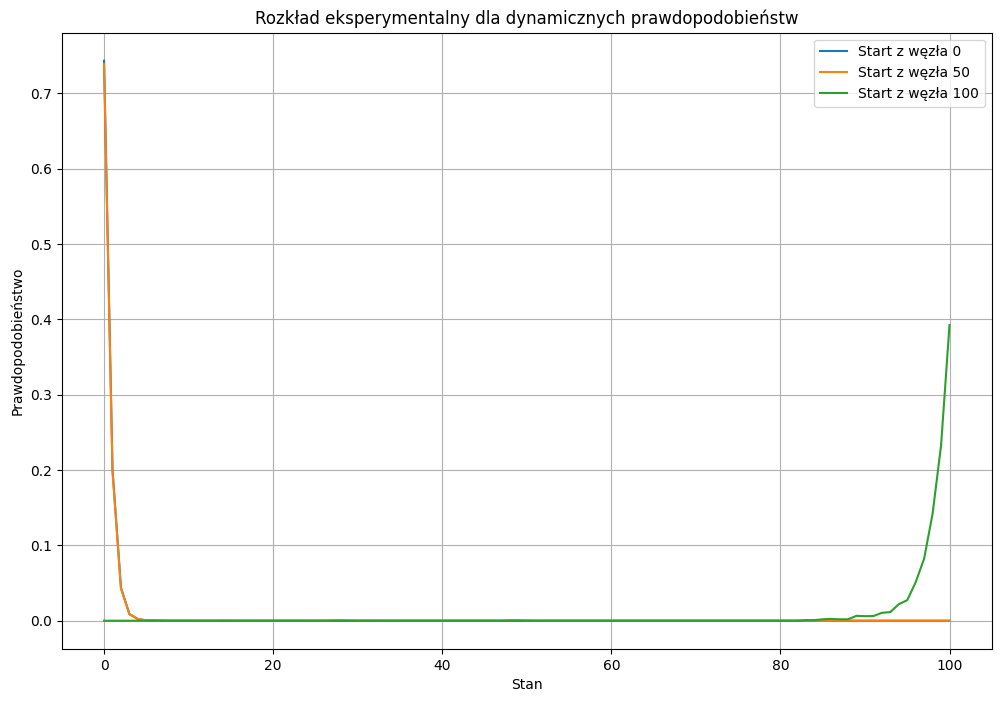

Wyniki eksperymentalne:
Start z węzła 0:
[7.432e-01 2.009e-01 4.380e-02 8.800e-03 2.200e-03 5.000e-04 4.000e-04
 2.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja macierzy przejść P dla 100 użytkowników z zależnymi prawdopodobieństwami
def create_transition_matrix_dynamic(n):
    P = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        if i == 0:
            # Niezalogowani użytkownicy
            P[i, i] = 0.8  # Pozostanie niezalogowanym
            P[i, i + 1] = 0.2  # Logowanie
        elif i == n:
            # Najwyższy stan zalogowanych użytkowników
            P[i, i] = 0.1 + 0.008 * i  # Pozostanie zalogowanym
            P[i, i - 1] = 1 - (0.1 + 0.008 * i)  # Wylogowanie
        else:
            # Wszyscy inni użytkownicy
            P[i, i - 1] = 1 - (0.1 + 0.008 * i)  # Wylogowanie
            P[i, i] = 0.1 + 0.008 * i  # Pozostanie zalogowanym
            P[i, i + 1] = 0.2  # Logowanie

        # Normalizacja wiersza do sumy 1 (na wszelki wypadek)
        row_sum = np.sum(P[i])
        if row_sum > 0:
            P[i] /= row_sum
    return P

# Parametry symulacji
N_users = 100
P = create_transition_matrix_dynamic(N_users)
Nmax = 10_000  # liczba losowań
start_nodes = [0, 50, 100]  # początkowe węzły

# Funkcja do przeprowadzenia eksperymentu
def simulate_markov_chain(P, start_node, Nmax):
    N = P.shape[0]
    counts = np.zeros(N)  # Licznik odwiedzin w każdym stanie
    current_node = start_node

    for _ in range(Nmax):
        counts[current_node] += 1
        current_node = np.random.choice(range(N), p=P[current_node])

    return counts / Nmax  # Normalizacja do rozkładu eksperymentalnego

# Wyniki dla każdego początkowego węzła
results = {}
for start_node in start_nodes:
    results[start_node] = simulate_markov_chain(P, start_node, Nmax)

# Wykres zbieżności dla każdego startu
plt.figure(figsize=(12, 8))

for start_node in start_nodes:
    plt.plot(range(N_users + 1), results[start_node], label=f"Start z węzła {start_node}")

plt.xlabel("Stan")
plt.ylabel("Prawdopodobieństwo")
plt.title("Rozkład eksperymentalny dla dynamicznych prawdopodobieństw")
plt.legend()
plt.grid()
plt.show()

# Wyniki eksperymentalne
print("Wyniki eksperymentalne:")
for start_node, distribution in results.items():
    print(f"Start z węzła {start_node}:")
    print(distribution)
